In [1]:
# Base libs and modules import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3]:
# Distribution of the dataset into training and test samples

In [4]:
(x_train, label_train), (x_test, label_test) = fashion_mnist.load_data()

In [5]:
# Normalizatoin dataset

In [6]:
x_train = x_train/255
x_test = x_test/255

In [7]:
# Intro train dataset

In [8]:
label_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

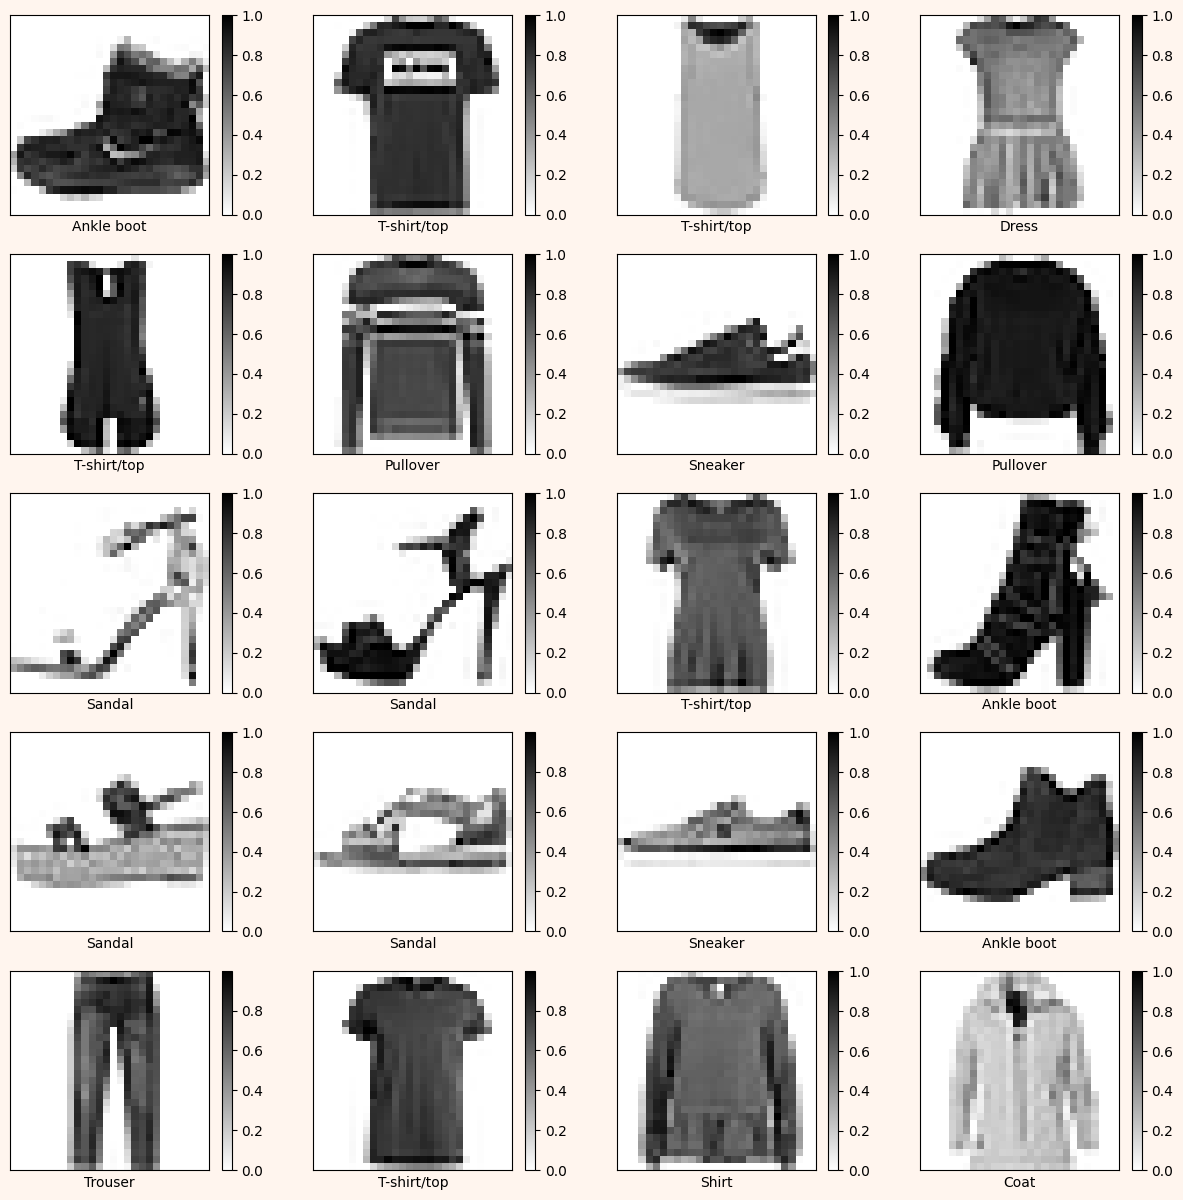

In [9]:
plt.figure(figsize=(15, 15), facecolor='SeaShell')
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.xlabel(label_name[label_train[i]])

In [10]:
# Create neural network model

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)   
])

In [12]:
# Compile model NN

In [13]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Learning model NN

In [16]:
history=model.fit(
    x_train,
    label_train,
    validation_split=0.1,
    epochs=10)

Epoch 1/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5079 - accuracy: 0.8212 - val_loss: 0.4040 - val_accuracy: 0.8542
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3818 - accuracy: 0.8631 - val_loss: 0.3618 - val_accuracy: 0.8672
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3373 - accuracy: 0.8782 - val_loss: 0.3471 - val_accuracy: 0.8692
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3154 - accuracy: 0.8850 - val_loss: 0.3598 - val_accuracy: 0.8673
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2952 - accuracy: 0.8905 - val_loss: 0.3319 - val_accuracy: 0.8795
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2824 - accuracy: 0.8946 - val_loss: 0.3263 - val_accuracy: 0.8828
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2681 - accuracy: 0.9012 - val_loss: 0.3219 - val_accuracy:

In [17]:
# Model results

In [18]:
results = model.evaluate(x_test, label_test)
print(f'Model Loss: {round(results[0], 3)} \nModel Accuracy: {round(results[1], 3)}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3423 - accuracy: 0.8820
Model Loss: 0.342 
Model Accuracy: 0.882


In [19]:
# Plot train and validation data

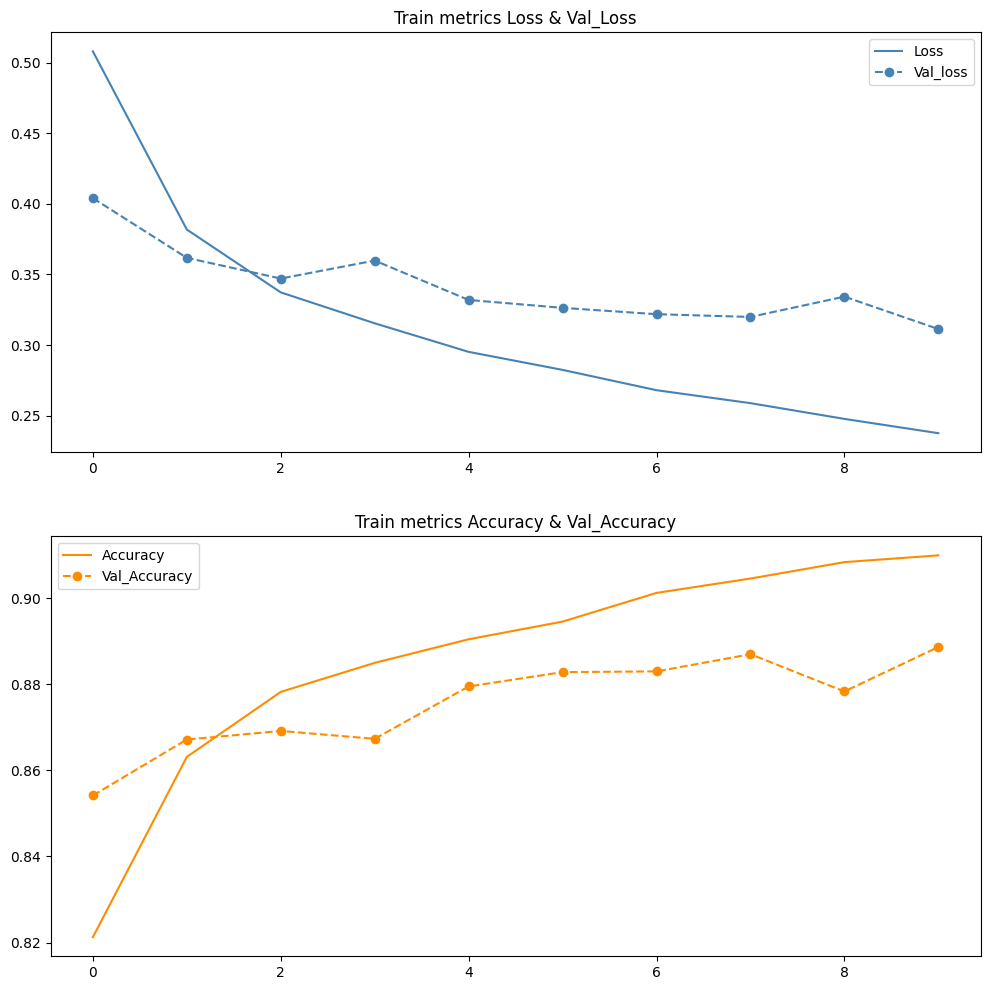

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))


axes[0].set_title('Train metrics Loss & Val_Loss')
axes[0].plot(history.history['loss'], label='Loss', color='SteelBlue')
axes[0].plot(history.history['val_loss'], label='Val_loss', marker='o', linestyle='--', color='SteelBlue')
axes[0].legend()

axes[1].set_title('Train metrics Accuracy & Val_Accuracy')
axes[1].plot(history.history['accuracy'], label='Accuracy', color='DarkOrange')
axes[1].plot(history.history['val_accuracy'], label='Val_Accuracy', marker='o', linestyle='--', color='DarkOrange')
axes[1].legend()

plt.show()

In [21]:
# Predict model NN

In [22]:
predict=model.predict(x_test)

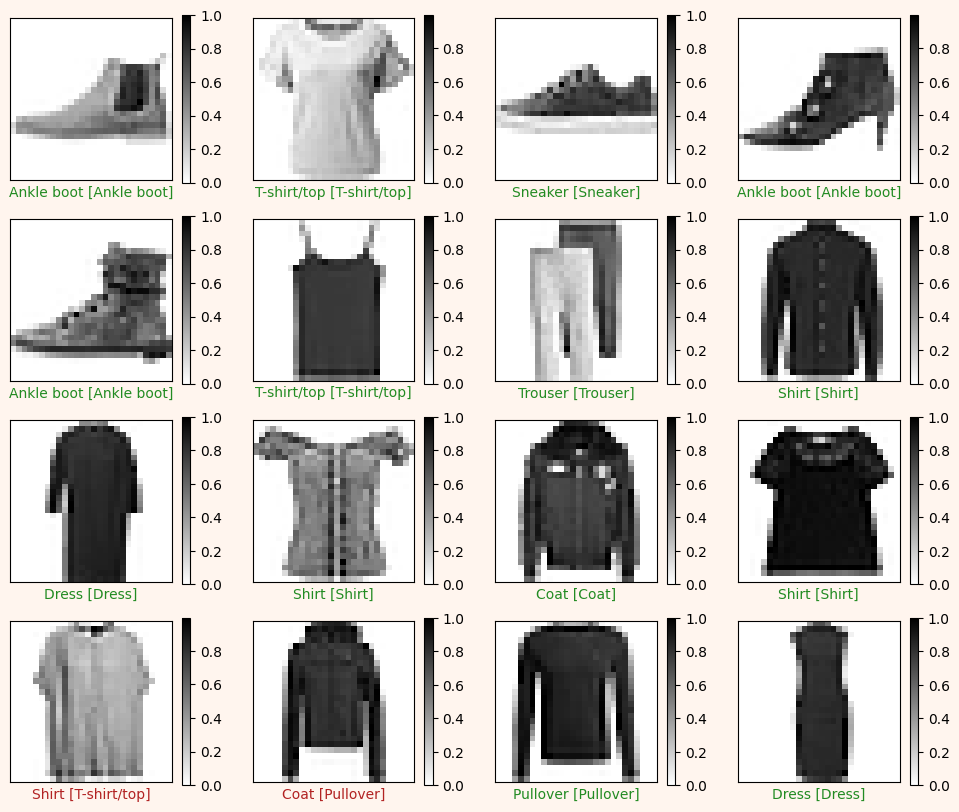

In [23]:
random_indexes = np.random.choice(len(x_test), size=16, replace=False)

plt.figure(figsize=(12, 10), facecolor='SeaShell')

for i in range(len(random_indexes)):
    
    index = random_indexes[i]
    
    pred_label = label_name[np.argmax(predict[index])]
    true_label = label_name[label_test[index]]
    
    if pred_label == true_label:
        color = "ForestGreen"
    else:
        color = "FireBrick"
    
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[index], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    
    plt.xlabel("{} [{}]".format(true_label, pred_label), color=color)